# Análise de Sistemas em Tempo Contínuo com a Transformada de Laplace 

## Função de Transferência e Teorema da Convolução

Anteriormente vimos que para um sistema de estado nulo a equação entrada-saída pode ser escrita como

$$Q(s)Y(s)=P(s)X(s)$$

Onde $X(s)=\mathcal{L}(x(t))$ e $Y(s)=\mathcal{L}(y(t))$.  A função racional

$$H(s)=\frac{Y(s)}{X(s)}$$

é a função de transferência do sistema, e além disso, $H(s)=\mathcal{L}(h(t))$. Considere um sistema $S$, com entrada $x(t)$ e saída $y(t)$, isto é:

\begin{equation*}
x(t)\rightarrow\,S\,\rightarrow y(t)
\label{}\tag{1}
\end{equation*}

e também sabemos que

\begin{equation*}
y(t)=x(t)*h(t).
\label{}\tag{2}
\end{equation*}

Da definição da função de transferência, podemos escrever que

\begin{equation*}
Y(s)=H(s)X(s).
\label{}\tag{3}
\end{equation*}

Se $x(t)=\delta(t)$, então $X(s)=1$ e $Y(s)=H(s)$, de onde fica mostrado que, com efeito, a função de transferência é a transformada de Laplace da resposta ao impulso. Comparando agora as equações (2) e (3), podemos concluir que 

\begin{equation*}
\mathcal{L}(x(t)*h(t))=H(s)X(s)
\label{}\tag{4}
\end{equation*}

Este resultado, que pode ser aplicado a qualquer par de funções com Transformada de laplace, é o *Teorema da Convolução*.


## Teoremas dos Valores Inicial e Final

### Teorema do Valor Inicial

Seja um sinal $x(t)$. A transformada de Laplace de sua derivada é

$$\mathcal{L}(x'(t)u(t))=sX(s)-x(0^-)=\int_{0^-}^{\infty} x'(t)e^{-st}\,dt=\int_{0^-}^{0^+}x'(t)e^{-st}\,dt=\int_{0^+}^{\infty} x'(t)e^{-st}\,dt,$$

$$sX(s)-x(0^-)=x(t)\big\|_{0^-}^{0^+}+\int_{0^+}^{\infty} x'(t)e^{-st}\,dt=x(0^+)-x(0^-)+\int_{0^+}^{\infty} x'(t)e^{-st}\,dt\quad\mbox{e}$$

$$sX(s)=x(0^+)+\int_{0^+}^{\infty} x'(t)e^{-st}\,dt.$$

Tomando o limite $s\rightarrow \infty$ na equação acima (desde que o limite exista), temos

$$\lim_{s\to\infty} sX(s)=\lim_{s\to\infty}\int_{0^+}^{\infty} x'(t)e^{-st}\,dt+x(0^+).$$

Como o limite da integral na equação acima é nulo, o Teorema do Valor Inicial afirma que 

$$x(0^+)=\lim_{s\to\infty}sX(s)$$

**Observação Importante** Se $X(s)$ não é uma função racional estritamente própria $(N>M)$, então o limite de $sX(s)$ não existe e o teorema não pode ser aplicado. 

### Teorema do Valor Final

Tomamos agora o limite quando $s\rightarrow 0$ na transformada de Laplace da derivada de $x(t)$, isto é

$$\lim_{s\to 0} sX(s)=\lim_{s\to 0}\int_{0^-}^{\infty} x'(t)e^{-st}\,dt+x(0^-)=x(t)\bigg\|_{0^-}^{\infty}+x(0^-).$$

Portanto, o teorema do valor final afirma que

$$x(\infty)=\lim_{s\to 0}sX(s).$$

**Exemplo** Análise de Laplace de um filtro passa-baixas $RC$

A *netlist* abaixo descreve um filtro passa-baixas $RC$ de primeira ordem.

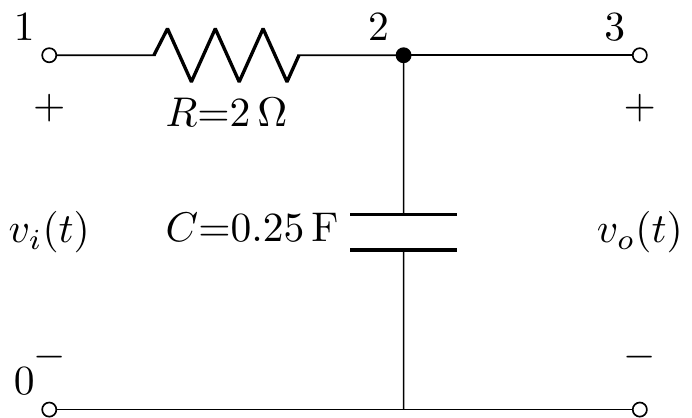

In [1]:
from lcapy import Circuit,t,voltage,sin,u,s

a = Circuit("""
P1 1 0; down=1.5, v_=v_i(t)
R 1 2 2; right=1.5
C 2 0_2 {1/4}; down
W 0 0_2; right
W 2 3; right
W 0_2 0_3; right
P2 3 0_3; down, v^=v_o(t)""")

a.draw()

Onde $v_i(t)$ é a tensão de entrada e $v_0(t)$ é a tensão de saída. A função de transferência do filtro pode ser encontrada especificando os nós, ou seja,

In [2]:
H = a.transfer(1, 0, 3, 0)
H

  1  
─────
s    
─ + 1
2    

A função de transferência também pode ser obtida especificando as componentes P1 e P2,

In [3]:
H = a.P1.transfer('P2')

H

  2  
─────
s + 2

Vamos definir um sinal senoidal de entrada com frequência angular $\omega=3 \frac{\mbox{rad}}{\mbox{s}}$, chaveado em $t=0$.

In [4]:
v_i = voltage(sin(3 * t) * u(t))

A transformada de Laplace da tensão de entrada é obtida como:

In [5]:
V_i = v_i(s)

V_i

  3   
──────
 2    
s  + 9

A transformada de Laplace da saída é encontrada usando o teorema da convolução:

In [6]:
V_o = V_i * H
V_o

       6        
────────────────
        ⎛ 2    ⎞
(s + 2)⋅⎝s  + 9⎠

Esta função tem 3 polos, que podem ficar explícitos com a forrma *zero-pole-gain* da resposta.

In [7]:
V_o.ZPK()

             6             
───────────────────────────
(s + 2)⋅(s - 3⋅ⅉ)⋅(s + 3⋅ⅉ)

A transformada inversa fornece a tensão de saída no domínio do tempo.

In [8]:
v_o = V_o(t)
v_o

  ⎛                                               -2⋅t⎞     
  ⎜2⋅sin(3⋅t)   cos(3⋅t)   (-2 - 3⋅ⅉ)⋅(-2 + 3⋅ⅉ)⋅ℯ    ⎟     
6⋅⎜────────── - ──────── + ───────────────────────────⎟⋅u(t)
  ⎝    39          13                  169            ⎠     

Este resultado pode ser simplificado com o método simplify_terms.

In [9]:
v_o.simplify_terms()

  ⎛   2⋅t               2⋅t             ⎞  -2⋅t     
2⋅⎝2⋅ℯ   ⋅sin(3⋅t) - 3⋅ℯ   ⋅cos(3⋅t) + 3⎠⋅ℯ    ⋅u(t)
────────────────────────────────────────────────────
                         13                         

Finalmente, podemos fazer um gráfico dos sinais de entrada e saída. 

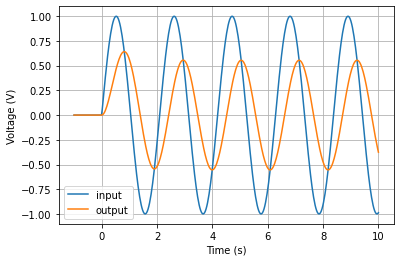

In [10]:
ax = v_i.plot((-1, 10), label='input')
ax = v_o.plot((-1, 10), axes=ax, label='output')
ax.legend();

## Estabilidade

Da equação $Q(s)Y(s)=P(s)X(s)$ obtemos $H(s)=\frac{P(s)}{Q(s)}$. Qual a relação entre $Q(s)$ e $Q(\lambda)$? São iguais? $Q(\lambda)$ é o polinômio característico do sistema, e descreve os seus modos característicos. Daí, $Q(\lambda)$ é uma descrição interna do sistema. Já $H(s)$ é uma relação de entrada-saída, não considerando o sistema internamente. $H(s)$ fornece uma descrição externa do sistema. Entretanto, se ao montar a função de transferência, não houver cancelamentos entre polos e zeros iguais no numerador e denominador de $H(s)$, então deste caso, $Q(s)=Q(\lambda)$, e portanto de Q(s) poderemos obter também informação sobre a estabilidade interna do sistema. 

Assim, a princípio, podemos dizer que se todos polos de $H(s)$, ou as raízes de $Q(s)$, são negativos, ou complexos com parte real negativa (os polos estão no semiplano esquerdo do plano complexo), então, o sistema é BIBO estável. Pois $\mathcal{L^{-1}}(\frac{A}{s+a})=Ae^{-at}$, de forma que a resposta ao impulso tende assintóticamente a zero sendo portanto absolutamente integrável. 

Se a função de transfererência não é própria, isso é, $M$, o grau $P(s)$, é maior que $N$, o grau de $Q(s)$, então o sistema é instável. Por exemplo, seja 

$$H(s)=\frac{s^3+4s^2+4s+5}{s^2+3s+2}=s+\frac{s^2+2s+5}{s^2+3s+2}.$$

Note o termo $s$, o primneiro termo de $H(s)$. Se um degrau ($X(s)=\frac{1}{s}$) é aplicado à entrada, a saída conterá um impulso, sendo portanto ilimitada e BIBO instável. 

Quando $Q(s)=Q(\lambda)$, então de $Q(s)$ podemos determinar a estabilidade quase da mesma forma que antes. 

* Se os polos de $H(s)$ estão no semiplano complexo esquerdo, o sistema é assintoticamente estável.
* Se um ou mais polos estão no semi plano direito, ou ainda, existem polos repetidos com parte real nula, o sistema é internamente instável e daí também BIBO instável. Note que $\mathcal{L}^{-1}(\frac{1}{s^2})=tu(t)$, instável.
* Se existem polos não repetidos com parte real nula, e nenhum polo no caso anterior, então o sistema é marginalmente estável e BIBO instável. Mote que $\mathcal{L}^{-1}(\frac{1}{s})=u(t)$.